# Proyecto Final de Aprendizaje Automático

---

## Entrenamiento del Modelo 1

**Autor**: Andrés Gil Vicente  
**Fecha de entrega**: 04/05/2025  

---

### Objetivos:

Este fichero tiene como objetivo principal realizar el entrenamiento del **Modelo 1**, utilizando todas las variables disponibles en el dataset de entrenamiento (`df_train.csv`). El propósito es generar predicciones precisas sobre la variable objetivo **`T3`**.

A lo largo de este proceso, se harán distintas pruebas con diferentes modelos, para ver cuál es el que ofrece mejor rendimiento a la hora de hacer predicciones sobre datos que no se han utilizado para entrenarlo (`df_val.csv`). Con cada modelo se realizarán las siguientes tareas:

1. **Entrenamiento del modelo**: Ajuste del modelo utilizando el conjunto de datos de train.

2. **Predicción del modelo**: Se tratará de hacer predicciones sobre el conjunto de datos de validación.

2. **Evaluación del modelo**: Validación del rendimiento del modelo mediante métricas como precisión, R2, F1-score, MSE, etc.

3. **Optimización del modelo**: Ajuste de hiperparámetros, validación cruzada, si es necesario, para mejorar el rendimiento del modelo. 

4. **Conclusiones y análisis sobre el modelo**: Se analizarán las métricas de performance que ha proporcionado el modelo para las predicciones realizadas, evvaluando de este modo si es una buena opción dicho modelo, o si es mejor buscar otras opciones.

---

### Resultados:

Tras la experimentación con distintos modelos de aprendizaje, se llegará a una conclusión basada en las métricas y estadísticas obtenidas a cerca del rendimiento de cada modelo. De este modo se decidirá cuál es el modelo que mejor se adapta a nuestras necesidades, y que pòr tanto vamos a emplear para predecir las notas (**`T3`**), del conjunto de test.

### Importamos las librerías necesarias:

In [ ]:
from funciones import* 

### Cargamos los ficheros de datos:

In [2]:
carpeta_datos = "processed_data"
df_train = pd.read_csv(f"{carpeta_datos}/df_train.csv", delimiter=",")
df_val = pd.read_csv(f"{carpeta_datos}/df_val.csv", delimiter=",")

Definimos cuáles van a ser las `x` y las `y`, para entrenar a nuestro modelo, así como para los datos de validación:

In [3]:
# Definimos cuál es nuestro target para predecir
variable_objetivo = "T3"

# Separamos en x e y
x_train = df_train[[var for var in df_train.columns if var != variable_objetivo]].to_numpy()
y_train = df_train[variable_objetivo].to_numpy()

# Lo mismo para el conjunto de validación
x_val = df_val[[var for var in df_val.columns if var != variable_objetivo]].to_numpy()
y_val = df_val[variable_objetivo].to_numpy()

### Primer Approach - Regresión Logística 

In [4]:
# Creamos y entrenamos el modelo
modelo = LogisticRegression(solver='lbfgs', max_iter=10000) 
modelo.fit(x_train, y_train)

# Predecimos
y_pred = modelo.predict(x_val)

# Calculamos las métricas de evaluación
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)
matriz = confusion_matrix(y_val, y_pred)
r2 = r2_score(y_pred=y_pred, y_true=y_val)

# Mostramos los resultados
print("Evaluación del modelo de regresión logística:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"R2 Score: {r2}")
print("\nMatriz de confusión:")
print(matriz)


Evaluación del modelo de regresión logística:
Accuracy : 0.327
Precision: 0.285
Recall   : 0.254
F1-score : 0.252
R2 Score: 0.6818222332260461

Matriz de confusión:
[[10  0  0  0  0  1  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  7  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  3  2  3  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  2  4 16 14  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  7 19  6  3  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5  8  5  5  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  7  5  4  3  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  2 12  2  3  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  6  9  2  1  2  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  3  3  3  5  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0

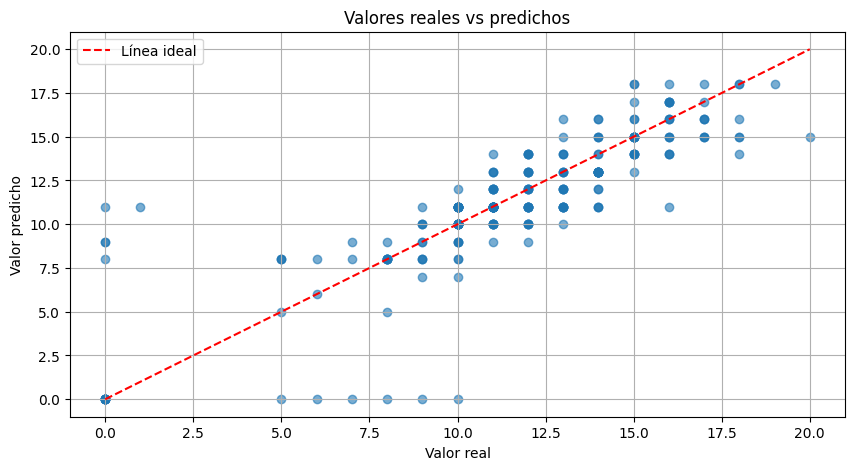

In [5]:
plot_real_vs_pred(y_true=y_val, y_pred=y_pred)

Tras evaluar las distintas métricas de rendimiento del modelo de regresión logística, podemos ver que este modelo no consigue hacerlo del todo bien, y aunque sus predicciones no están del todo desencaminadas con respecto de las notas reales, buscaremos mejores opciones, que además ofrezcan menor complejidad.

### Segundo Approach - KNN aplicado a Regresión:

Hacemos validación cruzada para ver qué valor de k (número de vecinos cercanos) es el óptimo para nuestro modelo. 

(Comentar el código si se desea evitar tener que esperar un poco de tiempo a que termine la ejecución de la validación cruzada)

Optimal value of k: 14 with a score of 0.63


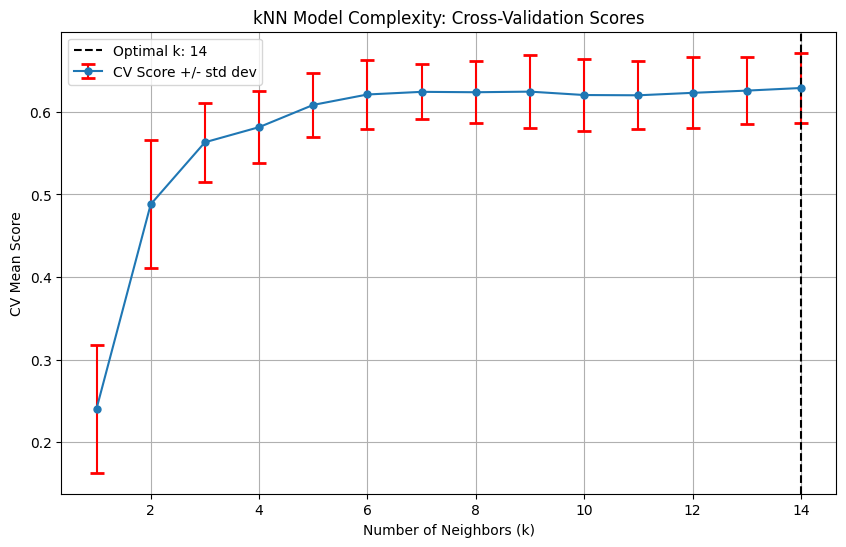

In [6]:
# Inicializamos las listas para almacenar las puntuaciones medias y las desviaciones estándar para cada valor de k
means_r2 = []
stds_r2 = []

# Definimos el rango de valores de k donde vamos a probar
k_values = range(1, 15)

# Extraemos los scores para cada valor de k
for k_val in k_values:
    # Definimos la instancia del modelo
    model = knn_reg()
    # Sacamos las predicciones para un k concreto (el fit se hace dentro)
    mean_r2, std_r2 = cross_validation(model=model, X=x_train , y=y_train , nFolds=5, k=k_val)  
    means_r2.append(mean_r2)  
    stds_r2.append(std_r2)

# Vemos cual es el máximo score
highest_score = np.max(means_r2)  # cogemos el máximo
indice_k_opt = np.where(means_r2==highest_score)[0]  # cogemos el índice donde está el máximo en el vector de mean_scores
optimal_k = np.array(k_values)[indice_k_opt][0]  # indexamos el vector de valores de k usando el índice y obtenemos la k optima

print(f"Optimal value of k: {optimal_k} with a score of {highest_score:.2f}")

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, means_r2, yerr=stds_r2, fmt='-o', ecolor='r', capsize=5, capthick=2, markersize=5, label='CV Score +/- std dev')
plt.axvline(x=optimal_k, linestyle='--', color='k', label=f'Optimal k: {optimal_k}')

plt.title('kNN Model Complexity: Cross-Validation Scores')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('CV Mean Score')
plt.legend()
plt.grid(True)
plt.show()


El gráfico de validación cruzada para el modelo KNN muestra cómo varía el rendimiento del modelo (medido por el score medio de validación cruzada, como el R²) en función del número de vecinos cercanos (`k`). A continuación, se destacan las observaciones clave:

1. **Tendencia General**:
    - A medida que aumenta el valor de `k`, el score de validación cruzada mejora inicialmente, lo que indica que el modelo se beneficia de considerar más vecinos para suavizar las predicciones.
    - Sin embargo, después de un cierto punto, el score se estabiliza, lo que sugiere que agregar más vecinos no mejora significativamente el rendimiento.

2. **Valor Óptimo de `k`**:
    - El valor óptimo de `k` se encuentra en **14**, ya que es donde se alcanza el score más alto (aproximadamente **0.629**). Este valor equilibra la complejidad del modelo y su capacidad de generalización.

3. **Desviación Estándar**:
    - Las barras de error en el gráfico representan la desviación estándar del score en las diferentes particiones de validación cruzada. A medida que `k` aumenta, las barras de error tienden a reducirse, lo que indica que el modelo es más estable y menos sensible a las variaciones en los datos.

4. **Sobreajuste vs Subajuste**:
    - Para valores pequeños de `k` (por ejemplo, `k=1`), el modelo puede sobreajustarse a los datos de entrenamiento, lo que resulta en un menor score de validación.
    - Para valores muy grandes de `k`, el modelo puede subajustarse, ya que promedia demasiados vecinos, perdiendo precisión en las predicciones.

De este modo, elegiremos un valor de `k` de **10**, ya que este maximizará el score de validación cruzada y proporcionará un equilibrio entre sobreajuste y subajuste.

Vemos que los valores de k entre 6 y 14, proporciona prácticamente la misma puntuación (score), por lo que darán lugar a modelos con predicciones de precisiones parecidas. Elegimos probar con la k más alta para que el modelo sea lo más "suave" posible en cuanto a la regresión, y que tenga en cuenta los votos de un mayor número de vecinos, equilibrando así la predicción y aportándole robustez.

Primero creamos la instancia del modelo de KNN para regresión:

In [7]:
# Creamos la instancia del modelo
model = knn_reg()
print(model)

kNN model (k=None, p=None)


Hacemos fit, para entrenar al modelo:

In [8]:
# Definimos primero el número de vecinos y la distancia a usar
k = 10
p = 2

model.fit(X_train=x_train, y_train=y_train, k=k, p=2)
print(model)

kNN model (k=10, p=2)


Hacemos predicciones sobre el propio conjunto de entrenamiento

In [9]:
# Primero vemos qué tal lo hace el modelo prediciendo sobre los datos de entrenamiento
y_pred = model.predict(X=x_train)

In [10]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_train, y_pred)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 1.413
MSE  (Error Cuadrático Medio): 4.550
RMSE (Raíz del MSE): 2.133
R²   (Coef. de determinación): 0.713


Hacemos predicciones sobre el conjunto de validación

In [11]:
# Ahora vemos qué tal lo hace el modelo prediciendo sobre los datos de validación
y_pred = model.predict(X=x_val)

In [12]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_val, y_pred)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 1.517
MSE  (Error Cuadrático Medio): 5.390
RMSE (Raíz del MSE): 2.322
R²   (Coef. de determinación): 0.664


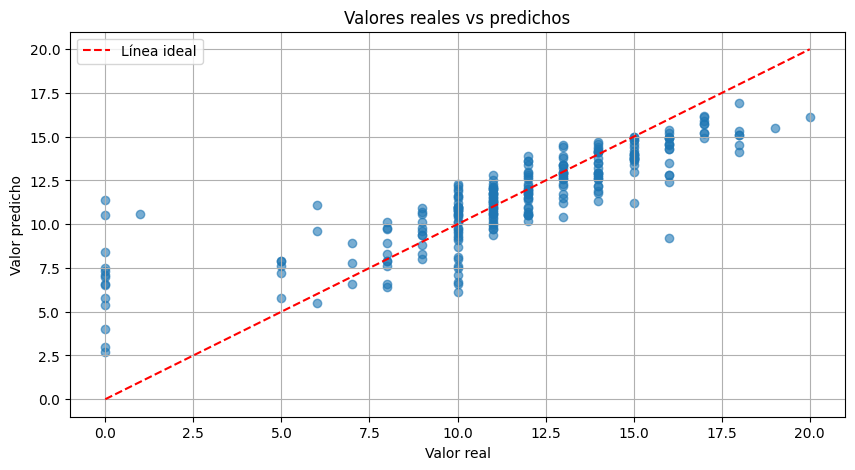

In [13]:
# Graficamos la relación entre los valores reales y las predicciones
plot_real_vs_pred(y_val, y_pred)

Las predicciones del modelo de KNN sobre los datos de validación tienen un R2 no muy alto y un MSE considerable, por lo tanto parece que este modelo no consigue una precisión muy notable. Lo descartamos como opción para tratar de predecir sobre los datos de test.

### Tercer Approach - Regresión Lineal:

In [14]:
# Instanciamos el modelo de regresión
modelo = LinearRegressor()
print(modelo)

In [15]:
# Entrenamos el modelo
modelo.fit(x_train, y_train)

In [16]:
# Predecimos sobre los datos de validación
y_pred = modelo.predict(x_val)

In [17]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_val, y_pred)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 1.014
MSE  (Error Cuadrático Medio): 2.731
RMSE (Raíz del MSE): 1.653
R²   (Coef. de determinación): 0.830


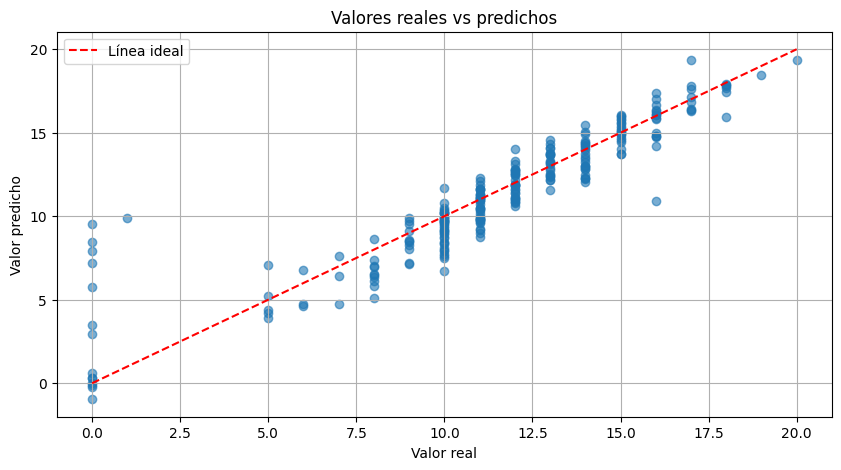

In [18]:
# Graficamos la relación entre los valores reales y las predicciones
plot_real_vs_pred(y_val, y_pred)

En nuestras predicciones obtenemos algún valor ligeramente negativo, por lo que debemos tenerlo en cuenta posteriormente cuando tratemos de predecir las notas en el conjunto de test, porque tendremos que hacer un clip inferior o alguna técnica similar.

In [19]:
# Obtenemos el mínimo para ver si hay valores negativos
y_pred.min()

-0.95889907515377

Este modelo, de regresión lineal, nos proporciona una predicción que más o menos se ajusta bastante bien a los datos del conjunto de validación. Vemos que alcanza un R2 de 0.83, lo cual está bastante bien. Además, cabe destacar la sencillez y simplicidad del modelo, ya que tan solo es una regresión lineal. Dicho todo esto, el modelo de regresión lineal puede ser una buena opción de cara a predecir sobre los datos de test.

### Cuarto Approach - Regresión con Árboles:

Primero hacemos validación cruzada para saber qué profundidad de árbol es la óptima

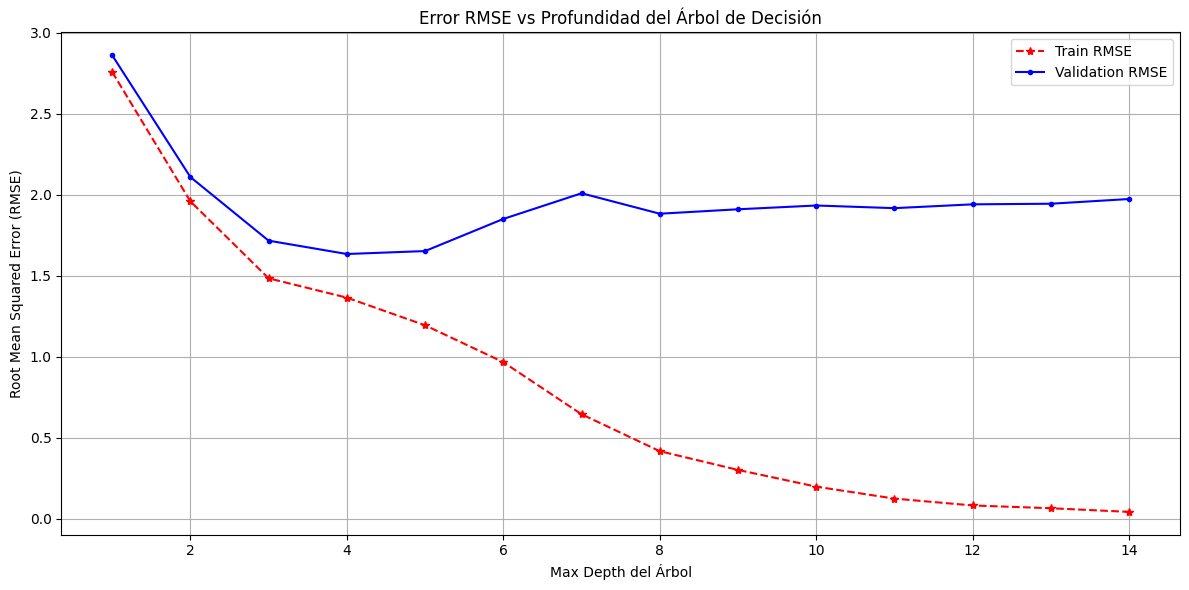

In [20]:
# Hacemos validación cruzada y ploteamos los resultados para analizarlos
plot_rmse_vs_depth(x_train, y_train, x_val, y_val, max_depth_range=range(1, 15), figsize=(12, 6))



### Observaciones sobre los resultados de la validación cruzada:
1. **Profundidad Óptima**: 
    - Una profundidad de 4 o 5 parece ser el punto óptimo, ya que minimiza el error de validación (RMSE). 
    - Profundidades mayores tienden a reducir el error en el conjunto de entrenamiento, pero no mejoran el error en el conjunto de validación, lo que sugiere sobreajuste.

2. **Sobreajuste**:
    - A medida que aumentamos la profundidad del árbol, el modelo se ajusta más a los datos de entrenamiento, lo que se refleja en un RMSE de entrenamiento cercano a 0.
    - Sin embargo, esto no se traduce en una mejora en el conjunto de validación, lo que indica que el modelo está aprendiendo ruido en lugar de patrones generales.

3. **Generalización**:
    - Un modelo con una profundidad de 4 o 5 parece generalizar mejor, ya que logra un equilibrio entre el error en los datos de entrenamiento y validación.


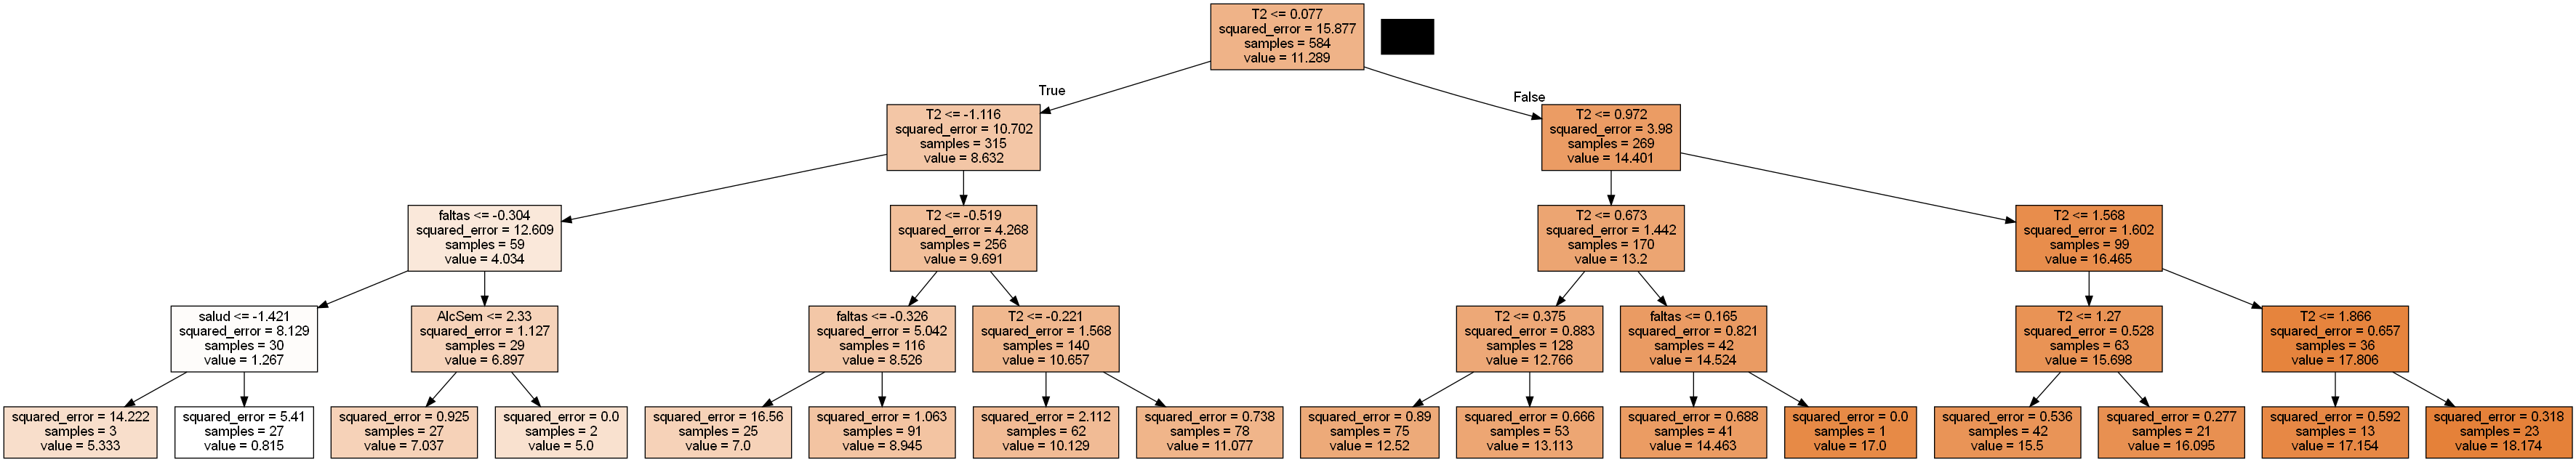

In [21]:
# Probamos a predecir con el árbol, cuya máxima profundidad proporciona la mejor performance
modelo = DecisionTreeRegressor(max_depth=4, random_state=1)

# Entrenamos el modelo
modelo.fit(x_train, y_train)

# Mostramos el árbol que hemos entrenado
dot_data = StringIO()
export_graphviz(modelo, 
                out_file=dot_data, 
                feature_names=[var for var in df_train.columns if var != variable_objetivo], 
                filled=True) 
                # class_names="salary")

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [22]:
# Predecimos
y_pred = modelo.predict(x_val)

In [23]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_val, y_pred)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 0.986
MSE  (Error Cuadrático Medio): 2.668
RMSE (Raíz del MSE): 1.633
R²   (Coef. de determinación): 0.834


El modelo de árbol de regresión con una profundidad máxima de 4 muestra un buen rendimiento en términos de predicción sobre los datos de validación. A continuación, se detallan las observaciones que más podemos destacar:

1. **Métricas de Evaluación**:

    El modelo alcanza un R² de **0.834**, lo que sugiere que el modelo tiene una buena capacidad para capturar patrones en los datos. Su MSE es **2.321**, lo que refleja el promedio de los errores al cuadrado. Aunque es una métrica útil, penaliza más los errores grandes. El RMSE es **1.524**, lo que proporciona una interpretación más intuitiva del error promedio en las mismas unidades que la variable objetivo. Por su parte, el MAE es **0.971**, lo que indica que, en promedio, las predicciones están a menos de 1 unidad de los valores reales.

2. **Ventajas del Modelo**:
    - **Interpretabilidad**: Los árboles de decisión son fáciles de interpretar y visualizar, lo que permite entender cómo se toman las decisiones.
    - **Generalización**: Con una profundidad limitada, el modelo evita el sobreajuste y generaliza bien a los datos de validación.

3. **Limitaciones**:
    - **Sensibilidad a los Datos**: Los árboles de decisión pueden ser sensibles a pequeñas variaciones en los datos, lo que podría afectar la estabilidad del modelo.
    - **Predicciones Constantes por Rango**: Dado que el árbol divide el espacio de características en regiones, las predicciones dentro de cada región son constantes, lo que puede limitar la precisión en problemas más complejos.

4. **Conclusión**:
    - El modelo de árbol de regresión es una opción sólida para este conjunto de datos, especialmente si se busca un equilibrio entre rendimiento y simplicidad. Sin embargo, para mejorar aún más las predicciones, se podrían explorar modelos más avanzados como Random Forest o Gradient Boosting, que combinan múltiples árboles para reducir la varianza y mejorar la precisión.

### Quinto Approach - Random Forest:

In [24]:
# Parámetros del bosque
n_estimators = 250
max_features = 0.8
max_samples = 0.9

# Separación explícita de variables predictoras y objetivo
target_col = "T3"
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

X_val = df_val.drop(columns=[target_col])
y_val = df_val[target_col]

# Lista donde vamos a ir guardando nuestras predicciones, el voto de cada árbol del bosque
predictions = []

# Creamos tantos modelos y predicciones, como el número de árboles hemos definido
for _ in range(n_estimators):
    
    # Bootstrap: muestreo de filas
    sample_indices = np.random.choice(X_train.index, size=int(len(X_train)*max_samples), replace=True)
    X_bootstrap = X_train.loc[sample_indices]
    y_bootstrap = y_train.loc[sample_indices]

    # Selección aleatoria de variables (sin reemplazo)
    feature_indices = np.random.choice(X_train.columns, size=int(X_train.shape[1]*max_features), replace=False)
    X_bootstrap_subset = X_bootstrap[feature_indices]
    X_val_subset = X_val[feature_indices]

    # Entrenamiento del árbol
    tree = DecisionTreeRegressor()  # Sin restricciones
    tree.fit(X_bootstrap_subset, y_bootstrap)

    # Predicción sobre validación
    y_pred = tree.predict(X_val_subset)
    predictions.append(y_pred)

# Promediamos las predicciones (voto por promedio)
predicciones_rf = np.mean(predictions, axis=0)


In [25]:
# Evaluamos y mostramos los resultados
performance = evaluate_regression(y_val, predicciones_rf)

Evaluación del modelo de regresión:
MAE  (Error Absoluto Medio): 0.988
MSE  (Error Cuadrático Medio): 2.320
RMSE (Raíz del MSE): 1.523
R²   (Coef. de determinación): 0.855


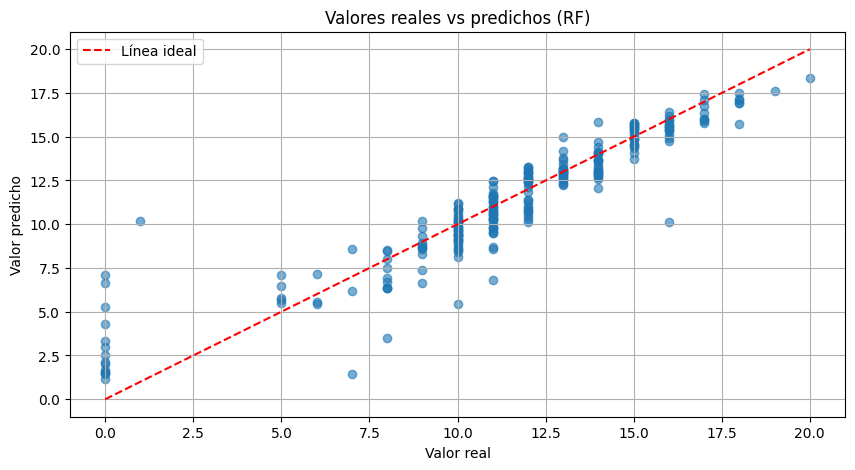

In [26]:
# Graficamos la relación entre los valores reales y las predicciones
plot_real_vs_pred(y_val, predicciones_rf,  "Valores reales vs predichos (RF)")

Vemos que el modelo de random forest nos proporciona unos buenos resultados en cuento a estadísticas de rendimiento. 

**Métricas de Performance**
- **R²**: 0.862 . Explica una gran cantidad de la variabilidad en los datos de validación, indicando una buena capacidad predictiva.  
- **MAE**: 0.971 . Los errores absolutos son bajos, lo que indica que las predicciones están cerca de los valores reales.  
- **RMSE**: 1.524 . Proporciona una interpretación intuitiva del error promedio en las mismas unidades que la variable objetivo.  
- **MSE**: 2.321 . Penaliza más los errores grandes, lo que podría indicar la presencia de valores atípicos que afectan la métrica.


**Ventajas**
1. **Capacidad Predictiva**: El modelo tiene un alto R², lo que demuestra su capacidad para capturar patrones en los datos.  
2. **Robustez**: Random Forest combina múltiples árboles, lo que reduce la varianza y mejora la generalización.  
3. **Flexibilidad**: Puede manejar datos con relaciones no lineales y características categóricas o continuas.  


**Inconvenientes**
1. **Sensibilidad a Valores Atípicos**: El MSE elevado sugiere que algunos valores atípicos pueden estar afectando las predicciones.  
2. **Dependencia Aleatoria**: Dado que el modelo depende de la selección aleatoria de características y muestras, las métricas de rendimiento pueden variar ligeramente entre ejecuciones; no obstante, hemos realizado bastantes pruebas y los valores están siempre cerca de las métricas mencionadas.


**Limitaciones**
- **Complejidad Computacional**: Entrenar un bosque con muchos árboles puede ser costoso en términos de tiempo y recursos.  

**Interpretabilidad**
- Random Forest no es tan fácil de interpretar como un árbol de decisión único, pero se pueden usar herramientas como la importancia de características para entender qué variables tienen mayor peso en las predicciones.  


**Conclusión**

El modelo Random Forest es una **opción sólida** para realizar predicciones en el conjunto de test. Combina precisión y generalización, lo que lo hace adecuado para nuestra situación. Sin embargo, se debe tener en cuenta su sensibilidad a valores atípicos y la variabilidad en las métricas debido a su naturaleza aleatoria. A pesar de estas limitaciones, su rendimiento lo posiciona como una **buena opción** para predecir sobre los datos de test.

---

### Análisis final y conclusiones: 

Tras realizar toda una serie de pruebas con diferentes modelos predictivos, hemos llegado a las siguientes conclusiones sobre cúales son los mejores modelos para emplear en las predicciones del **Modelo 1**:

1. **Regresión Lineal**:
    - **Ventajas**:
        - Simplicidad: Es un modelo fácil de interpretar y rápido de entrenar.
        - Buen rendimiento: Nos proporciona un R² superior a **0.83**, lo que indica que explica una gran parte de la variabilidad en los datos.
    - **Desventajas**:
        - Predicciones negativas: En algunos casos, nos ha generado valores negativos, lo cual no tiene sentido en el contexto de las notas. Esto requeriría aplicar un clip inferior para evitar valores no válidos, lo cual tendremos que tener en cuenta si predecimos con él.
        - Limitaciones en relaciones no lineales: aunque en este contecto funciona aparentemente bien, no captura relaciones complejas entre las variables, y en datos que no hemos visto aún podría tener una peor performance.

2. **Árbol de Decisión**:
    - **Ventajas**:
        - Interpretabilidad: Permite visualizar cómo se toman las decisiones, lo que facilita su comprensión.
        - Buen rendimiento: Alcanzó un R² superior a **0.83**, similar al de la regresión lineal.
        - Generalización: Con una profundidad limitada (máx. 4), evita el sobreajuste y generaliza bastante bien.
    - **Desventajas**:
        - Predicciones constantes: Dentro de cada región, las predicciones son constantes, lo que puede limitar la precisión.
        - Sensibilidad a los datos: Pequeñas variaciones en los datos pueden afectar la estructura del árbol. Varianza alta.

3. **Random Forest**:
    - **Ventajas**:
        - Alto rendimiento: Obtuvo un R² superior a **0.86**, el más alto entre los modelos probados.
        - Robustez: Combina múltiples árboles, lo que reduce la varianza y mejora la generalización.
        - Flexibilidad: Maneja relaciones no lineales y características tanto categóricas como continuas.
    - **Desventajas**:
        - Complejidad computacional: Entrenar un bosque con muchos árboles puede ser costoso en términos de tiempo y recursos.
        - Interpretabilidad: Es menos interpretable que un árbol de decisión único, y por supuesto también que una regresión lineal.

### Elección del modelo:

Aunque el **Random Forest** y el **Árbol de Decisión** son opciones válidas y atractivas debido a su buen rendimiento, de hecho son los modelos que mejor rendimiento nos dan a nivel de métricas de performance, vamos a quedarnos con el modelo de **Regresión Lineal** como modelo final para hacer las predicciones del **Modelo 1**. 

Para justificar nuestra elección nos basamos en la **navaja de Ockham**, un principio filosófico y metodológico que defiende lo siguiente:

    “En igualdad de condiciones, la explicación más simple suele ser la correcta.”


Este principio establece que, entre varias explicaciones posibles para un fenómeno o relación, la explicación más simple suele ser la mejor, siempre y cuando esta explique adecuadamente los datos. En el contexto del aprendizaje automático, esto implica que, dado un conjunto de modelos con un rendimiento similar, se debe preferir el modelo más sencillo, ya que es menos propenso al sobreajuste y más fácil de interpretar y mantener.

En este caso, aunque los modelos de Random Forest y Árbol de Decisión ofrecen métricas de rendimiento ligeramente superiores, el modelo de Regresión Lineal es lo suficientemente preciso como para capturar las relaciones en los datos y proporcionar predicciones aceptables. Además, su simplicidad lo hace más interpretable y eficiente computacionalmente, lo que es especialmente valioso en escenarios donde la transparencia y la facilidad de implementación son importantes. Por lo tanto, nos quedamos con el `modelo de Regresión Lineal` como la mejor opción para el Modelo 1. A continuación, en el fichero predicciones.ipynb, lo usaremos para predecir las notas (T3) del dataset de test.

